# Decision Tree

In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install graphviz - install using cmd

## Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import *
import pydotplus
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Load the dataset from a CSV file

In [4]:
data = sns.load_dataset('titanic')

## Explore the dataset with EDA

In [5]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
data.shape

(891, 15)

In [7]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
data['age'] = data['age'].fillna(np.mean(data['age']))

## Visualize the dataset

## Data Preprocessing

In [9]:
# Split the data into features and target
X = data.drop(['survived','deck'], axis=1)
y = data['survived']

In [10]:
X= pd.get_dummies(X)

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
445,1,4.000000,0,2,81.8583,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,True
650,3,29.699118,0,0,7.8958,True,True,False,True,False,...,False,True,False,True,False,False,False,True,True,False
172,3,1.000000,1,1,11.1333,False,False,True,False,False,...,False,True,True,False,False,False,False,True,False,True
450,2,36.000000,1,2,27.7500,True,False,False,True,False,...,True,False,False,True,False,False,False,True,True,False
314,2,43.000000,1,1,26.2500,True,False,False,True,False,...,True,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,False,True,True,False,False,...,False,True,False,False,True,False,False,True,False,True
270,1,29.699118,0,0,31.0000,True,True,False,True,False,...,False,False,False,True,False,False,False,True,True,False
860,3,41.000000,2,0,14.1083,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,False
435,1,14.000000,1,2,120.0000,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True


## Decision Tree Classifier

In [13]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [14]:
# Train the decision tree model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [16]:
# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [17]:
y.unique()

array([0, 1])

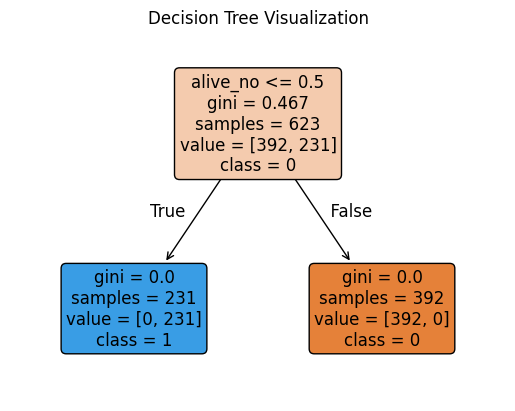

In [18]:
plot_tree(clf, 
         feature_names=X.columns,  # or your feature names
         class_names=[str(cls) for cls in y.unique()],  # Convert to strings
         filled=True,
         rounded=True,
         fontsize=12)
plt.title("Decision Tree Visualization")
plt.savefig("iris_decision_tree1.png", dpi=300, bbox_inches='tight')
plt.show()

# Building & Evaluating Random Forest and Gradient Boosting models

- Comparing the results with the single Decision Tree model

In [19]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [20]:
# Create and train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Make predictions using Random Forest
rf_y_pred = rf_clf.predict(X_test)

In [22]:
# Evaluate Random Forest model
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [23]:
# Create and train a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [24]:
# Make predictions using Gradient Boosting
gb_y_pred = gb_clf.predict(X_test)

In [25]:
# Evaluate Gradient Boosting model
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [26]:
# Compare results with single Decision Tree
print("\nComparison with Single Decision Tree:")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison with Single Decision Tree:
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00


# Building & Evaluating Random Forest and Gradient Boosting models

- Comparing the results with the two Decision Tree model

In [27]:
# Create and train two separate Decision Tree classifiers
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

tree2 = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limited depth for the second tree
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [28]:
# Make predictions using the two decision trees
tree1_y_pred = tree1.predict(X_test)
tree2_y_pred = tree2.predict(X_test)

In [29]:
# Evaluate the first decision tree
tree1_accuracy = metrics.accuracy_score(y_test, tree1_y_pred)
tree1_precision = metrics.precision_score(y_test, tree1_y_pred, average='weighted')
tree1_recall = metrics.recall_score(y_test, tree1_y_pred, average='weighted')
tree1_f1_score = metrics.f1_score(y_test, tree1_y_pred, average='weighted')

In [30]:
# Evaluate the second decision tree
tree2_accuracy = metrics.accuracy_score(y_test, tree2_y_pred)
tree2_precision = metrics.precision_score(y_test, tree2_y_pred, average='weighted')
tree2_recall = metrics.recall_score(y_test, tree2_y_pred, average='weighted')
tree2_f1_score = metrics.f1_score(y_test, tree2_y_pred, average='weighted')

In [31]:
# Print evaluation metrics for the two decision trees
print("Decision Tree 1 Metrics:")
print(f"Accuracy: {tree1_accuracy:.2f}")
print(f"Precision: {tree1_precision:.2f}")
print(f"Recall: {tree1_recall:.2f}")
print(f"F1 Score: {tree1_f1_score:.2f}")

print("\nDecision Tree 2 Metrics:")
print(f"Accuracy: {tree2_accuracy:.2f}")
print(f"Precision: {tree2_precision:.2f}")
print(f"Recall: {tree2_recall:.2f}")
print(f"F1 Score: {tree2_f1_score:.2f}")

Decision Tree 1 Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Decision Tree 2 Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [32]:
# Compare the results of all models
print("\nComparison of Models:")
print(f"Decision Tree 1 Accuracy: {tree1_accuracy:.2f}")
print(f"Decision Tree 2 Accuracy: {tree2_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")



Comparison of Models:
Decision Tree 1 Accuracy: 1.00
Decision Tree 2 Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
